In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [21]:
df = pd.read_csv("breast-cancer.csv")  # Make sure the CSV is in the same directory or give full path
df = df.drop(columns=['id'], errors='ignore')
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})  # Encode diagnosis: M = 1, B = 0

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [24]:
linear_svm = SVC(kernel='linear', C=1)
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)

print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))

Linear SVM Accuracy: 0.956140350877193


In [25]:
rbf_svm = SVC(kernel='rbf', C=1, gamma='scale')
rbf_svm.fit(X_train, y_train)
y_pred_rbf = rbf_svm.predict(X_test)

print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("\nClassification Report (RBF):\n", classification_report(y_test, y_pred_rbf))

RBF SVM Accuracy: 0.9736842105263158

Classification Report (RBF):
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [26]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=0, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters from GridSearch:", grid.best_params_)

Best Parameters from GridSearch: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [27]:
best_model = grid.best_estimator_
scores = cross_val_score(best_model, X_scaled, y, cv=5)

print("Cross-Validation Scores:", scores)
print("Mean CV Accuracy:", scores.mean())

Cross-Validation Scores: [0.97368421 0.95614035 1.         0.96491228 0.97345133]
Mean CV Accuracy: 0.9736376339077782


In [28]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

svc_vis = SVC(kernel='rbf', C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])
svc_vis.fit(X_pca, y)

SVC(C=1)

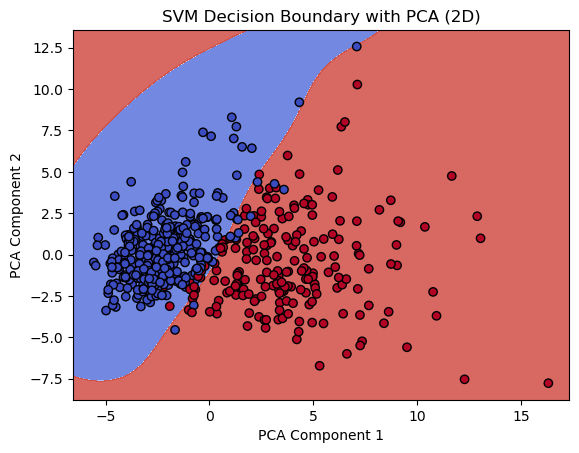

In [29]:
def plot_decision_boundary(X, y, model):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.title("SVM Decision Boundary with PCA (2D)")
    plt.show()

plot_decision_boundary(X_pca, y, svc_vis)